In [39]:
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"

from tensorflow import keras
from segmentation_models import Unet, Linknet, PSPNet, FPN


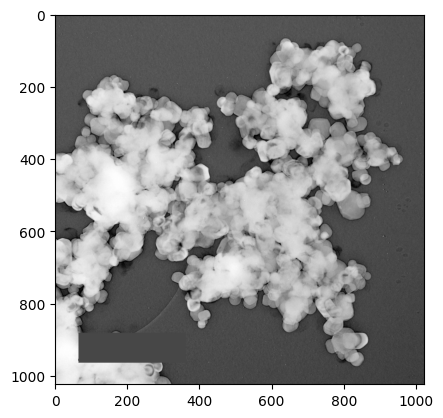

In [86]:
import os
import cv2
import numpy as np

# Specify the folder path containing TIFF images
tiff_folder = './Images'

# Load TIFF images
image = cv2.imread("Images/02_Frame_08.tif", cv2.IMREAD_UNCHANGED)
npy_image = np.load("Images/02_Frame_08_seg.npy",allow_pickle=True)

import matplotlib.pyplot as plt
plt.imshow(image)

In [96]:
npy_image

array({'outlines': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16), 'colors': array([[101, 219, 174],
       [147,  57,  57],
       [ 37, 202, 148],
       [118, 185,  66],
       [149,  60,  38],
       [219, 222, 190],
       [160,  89, 131],
       [183, 217, 208],
       [147, 213,  43],
       [ 65,  34,  91],
       [ 26, 191, 169],
       [174, 182,  40],
       [ 98,  49, 201],
       [152,  93,  38],
       [ 58, 215, 190],
       [ 63, 207, 135],
       [190, 208,  90],
       [192, 201,  26],
       [ 49,  94, 217],
       [ 76, 126,  86],
       [128,  36,  82],
       [210,  74,  55],
       [125, 226,  74],
       [162, 180,  73],
       [174, 100, 154],
       [154, 134,  43],
       [195,  90,  63],
       [ 33, 146, 163],
       [ 95,  48, 214],
       [204,  78, 160],
       [209, 154,  94],
       

In [97]:
model = PSPNet('resnet34', encoder_weights='imagenet')
model.summary

<bound method Model.summary of <keras.src.engine.functional.Functional object at 0x7f65a9b445e0>>

In [98]:
model.summary()

Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 data (InputLayer)           [(None, 384, 384, 3)]        0         []                            
                                                                                                  
 bn_data (BatchNormalizatio  (None, 384, 384, 3)          9         ['data[0][0]']                
 n)                                                                                               
                                                                                                  
 zero_padding2d_136 (ZeroPa  (None, 390, 390, 3)          0         ['bn_data[0][0]']             
 dding2D)                                                                                         
                                                                                           

In [99]:
print(image.shape)


(1024, 1024, 3)


In [100]:
im = cv2.resize(image,(384, 384))
im = im.reshape(1, 384,384, 3)
print(im.shape)
segmented = model.predict(im)


(1, 384, 384, 3)
1/1 [==============================] - 0s 297ms/step


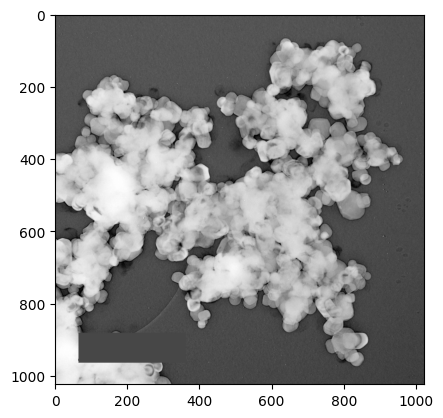

In [101]:
import matplotlib.pyplot as plt 
plt.imshow(image)

In [102]:
from sklearn.cluster import MiniBatchKMeans
print(segmented.shape)
clustering = MiniBatchKMeans(n_clusters=2)
yes_no = clustering.fit_predict(segmented.reshape(-1,21))



(1, 384, 384, 21)


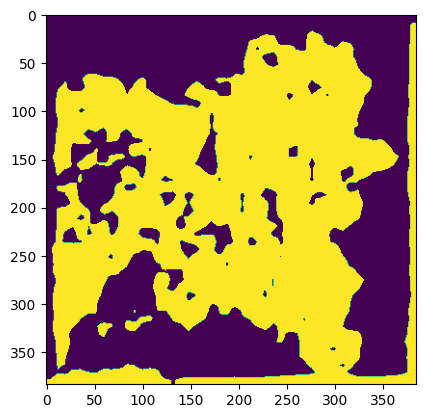

In [103]:
yes_no = yes_no.reshape(384,384,1)
plt.imshow(yes_no)